In [1]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Project 1 

# 1. Set up the data, exploring the data.

Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Dataset ('AviationData.csv')

In [3]:
Qdf = pd.read_csv('./data/Aviation_Data.csv', encoding='ISO-8859-1', low_memory=False)

In [4]:
Qdf.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
Qdf.shape

(90348, 31)

In [6]:
Qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

There seem like big portions of missing values in Latitude, Longitude, Airport code, Airport name, aircraft. categories, FAR. Description, Schedule, Air carrier, broad.phase.of.flight.

The datatypes are objects and floats.

# Looking into models and makes in the crashes

Data Cleaning

In [7]:
Qdf['Make'].value_counts()

Cessna                         22227
Piper                          12029
CESSNA                          4922
Beech                           4330
PIPER                           2841
                               ...  
BROWN JAMES W                      1
AMERICAN Champion                  1
Hallburg                           1
AGUSTAWESTLAND PHILADELPHIA        1
Heveron                            1
Name: Make, Length: 8237, dtype: int64

It seems like there is a lot of cleaning we have to do.
Cessna, CESSNA are the same make. 
Same for BOEING nad Boeing.BEECH and Beech, Aero Vodochody Aero Works and Aero Vodochody Aero. Works.
Aerofab Inc. and Aerofab, Inc.
Piper and PIPER.
BELL and Bell.


Aerostar International                
Aerostar International Inc            
Aerostar International Inc.           
Aerostar International, Inc.          
Air Tractor                         
Air Tractor Inc                       
Air Tractor Inc.                      
Air Tractor, Inc.                     
Airbus Industrie                   
Airbus Industries                     
Grumman                           
Grumman American                  
... more



Clean the NaNs

In [8]:
90348-88826

1522

In [9]:
1522/90348

0.016845973347500775

I am planning to drop the NaNs. They are only 1.7% of the values.

In [10]:
Qdf1 = Qdf.dropna(subset=['Make']) # drop the NaNs

In [11]:
Qdf1['Make'].isna().sum()

0

In [12]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].str.strip().str.upper()

/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AEROSTAR INTERNATIONAL INC": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL INC.": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL, INC.": "AEROSTAR INTERNATIONAL"})

In [14]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN CHAMPION (ACAC)": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT COR": "AMERICAN CHAMPION"})

In [15]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [16]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "FIREFLY BALLOON, INC.": "FIREFLY",
    "FIREFLY BALLOONS": "FIREFLY",
    "FIREFLY BALLOONS 2010 INC": "FIREFLY",
    "FIREFLY BALLOONS INC": "FIREFLY",
    "FIREFLY BALLOONS, INC": "FIREFLY"})

In [17]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AIR TRACTOR INC": "AIR TRACTOR",
    "AIR TRACTOR INC.": "AIR TRACTOR",
    "AIR TRACTOR, INC.": "AIR TRACTOR"})

In [18]:
Qdf1['Make'].value_counts()

CESSNA                   27149
PIPER                    14870
BEECH                     5372
BOEING                    2745
BELL                      2722
                         ...  
LOPEZ LANCAIR                1
RENNICKE MIDGET MUSTA        1
ORLICAN                      1
BELEW MARSHALL D II          1
VALENZA                      1
Name: Make, Length: 7569, dtype: int64

In [19]:
# sorting alphabetically so we can quickly find more duplicates
Qdf1['Make'].value_counts().sort_index()

107.5 FLYING CORPORATION    1
1200                        1
177MF LLC                   1
1977 COLFER-CHAN            1
1ST FTR GP                  1
                           ..
ZUBAIR S KHAN               1
ZUBER THOMAS P              1
ZUKOWSKI                    1
ZWART                       1
ZWICKER MURRAY R            1
Name: Make, Length: 7569, dtype: int64

In [20]:
# Scott's Idea to Clean Duplicate - Select all values (for example Cameron), generate a script
# that merges all into one value
# Olu's Idea - Use Regex to filter out and find similar values, then merge them into one
# Qi's Idea - use fuzzywuzzy to find similar names

Seems like I can pull out the top 15 makes now,even there are still some naming issues.

In [21]:
Qdf1['Make'].value_counts()[:15]

CESSNA               27149
PIPER                14870
BEECH                 5372
BOEING                2745
BELL                  2722
MOONEY                1334
ROBINSON              1230
GRUMMAN               1172
BELLANCA              1045
HUGHES                 932
AIR TRACTOR            918
SCHWEIZER              773
AERONCA                636
MCDONNELL DOUGLAS      608
MAULE                  589
Name: Make, dtype: int64

In [22]:
Top_15_Makes = list (Qdf1['Make'].value_counts()[:15].index)

In [23]:
Top_15_Makes_Crash_Counts = list (Qdf1['Make'].value_counts()[:15].values)
Top_15_Makes_Crash_Counts

[27149,
 14870,
 5372,
 2745,
 2722,
 1334,
 1230,
 1172,
 1045,
 932,
 918,
 773,
 636,
 608,
 589]

Text(0.5, 1.0, 'Top 15 Makes in Crashes')

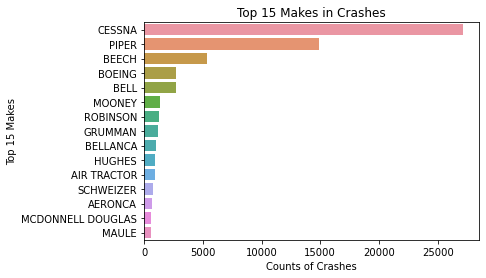

In [24]:
fig,ax = plt.subplots()
sns.barplot(x=Top_15_Makes_Crash_Counts,y=Top_15_Makes,ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 15 Makes')
ax.set_title('Top 15 Makes in Crashes')

Explore the models within of the top 15 makes

In [25]:
Qdf1[['Make','Model']].value_counts() # this gives with both make and model, counts of crashes from high to low.

Make                      Model            
CESSNA                    152                  2366
                          172                  1753
                          172N                 1163
PIPER                     PA-28-140             932
CESSNA                    150                   829
                                               ... 
MAXFLY INC/MCKAY WM       SEAREY                  1
MAXFIELD                  PITTS S-1S              1
MAXCY CHRISTOPHER L       STOL KING               1
MAXAIR DRIFTER            DRIFTER II              1
107.5 FLYING CORPORATION  One Design DR 107       1
Length: 18412, dtype: int64

In [26]:
Qdf1[['Make','Model']].value_counts()[:50]

Make      Model     
CESSNA    152           2366
          172           1753
          172N          1163
PIPER     PA-28-140      932
CESSNA    150            829
          172M           798
          172P           689
          182            659
          180            621
          150M           585
PIPER     PA-18          578
          PA-28-180      572
          PA-18-150      571
          PA-28-161      565
          PA-28-181      529
BELL      206B           516
BOEING    737            489
PIPER     PA-38-112      468
CESSNA    150L           460
BEECH     A36            419
CESSNA    140            401
          170B           389
          172S           371
GRUMMAN   G-164A         365
PIPER     PA-32-300      356
CESSNA    182P           355
PIPER     PA-24-250      352
          PA-28R-200     334
          PA-12          324
CESSNA    A188B          318
PIPER     PA-23-250      311
CESSNA    177            296
MOONEY    M20J           287
CESSNA    A185F       

Make a new column 'Make_and_Model' to combine make and model

In [27]:
Qdf1['Make_and_Model'] = Qdf1['Make']+str(' ')+Qdf1['Model']

<ipython-input-27-0fa3b8baa062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qdf1['Make_and_Model'] = Qdf1['Make']+str(' ')+Qdf1['Model']


In [28]:
Qdf1['Make_and_Model'].head()

0     STINSON 108-3
1    PIPER PA24-180
2       CESSNA 172M
3      ROCKWELL 112
4        CESSNA 501
Name: Make_and_Model, dtype: object

In [29]:
Qdf1['Make_and_Model'].value_counts()

CESSNA 152                       2366
CESSNA 172                       1753
CESSNA 172N                      1163
PIPER PA-28-140                   932
CESSNA 150                        829
                                 ... 
KLEMP GREGORY J CHALLENGER II       1
ROUSE Glasair III                   1
AERODYNE VECTOR 727 SENIOR          1
MONROIG PEDRO J RANS S-6S           1
DANGREMOND CHALLENGER II            1
Name: Make_and_Model, Length: 18386, dtype: int64

In [30]:
top_50_make_and_model_crashes= Qdf1['Make_and_Model'].value_counts()[:50]

In [31]:
top_50_make_and_model_crashes

CESSNA 152          2366
CESSNA 172          1753
CESSNA 172N         1163
PIPER PA-28-140      932
CESSNA 150           829
CESSNA 172M          798
CESSNA 172P          689
CESSNA 182           659
CESSNA 180           621
CESSNA 150M          585
PIPER PA-18          578
PIPER PA-28-180      572
PIPER PA-18-150      571
PIPER PA-28-161      565
PIPER PA-28-181      529
BELL 206B            516
BOEING 737           489
PIPER PA-38-112      468
CESSNA 150L          460
BEECH A36            419
CESSNA 140           401
CESSNA 170B          389
CESSNA 172S          371
GRUMMAN G-164A       365
PIPER PA-32-300      356
CESSNA 182P          355
PIPER PA-24-250      352
PIPER PA-28R-200     334
PIPER PA-12          324
CESSNA A188B         318
PIPER PA-23-250      311
CESSNA 177           296
MOONEY M20J          287
CESSNA A185F         285
PIPER PA-22-150      281
PIPER PA-31-350      280
CESSNA 185           279
PIPER PA28           279
AERONCA 7AC          271
ROBINSON R44         267


In [32]:
top_50_make_and_model =list(top_50_make_and_model_crashes.index)

In [33]:
top_50_make_and_model_crashes =list(top_50_make_and_model_crashes.values)

Text(0.5, 1.0, 'Top 50 Makes and Models in Crashes')

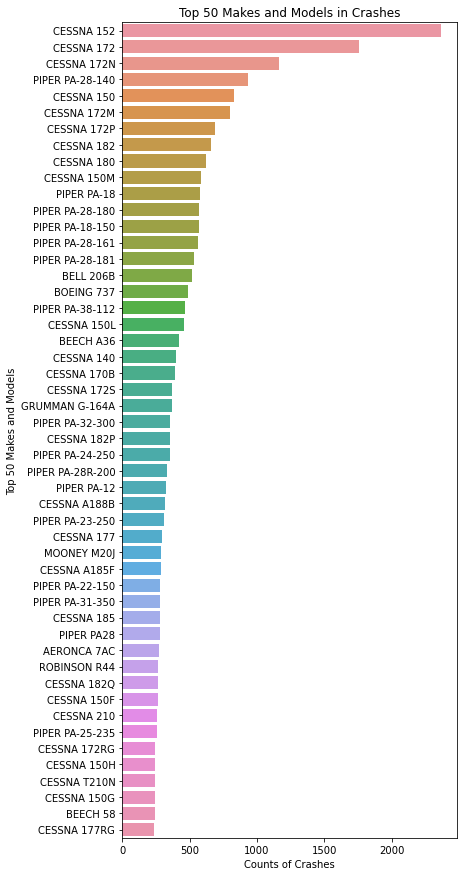

In [34]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=top_50_make_and_model_crashes,y=top_50_make_and_model, ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 50 Makes and Models')
ax.set_title('Top 50 Makes and Models in Crashes')


In [35]:
# According to the above graph from the 50 top aircraft in crashes,
# CESSNA 177RG is the safest model in this list, while the CESSNA 152
# has the most crashes of all models.

# Looking into Weather Conditions and Crashes

In [36]:
Qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [37]:
# calculating the percentage of NaN rows in Weather Condition column
(90348-84397)/90348

0.0658675344224554

6.6% data points are NaN in weather Condition column.. Let's see what should we do with them...

In [38]:
Qdf['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [39]:
#UNK and Unk are the same. I am going to combine both.
Qdf2 = Qdf1
Qdf2.loc[:,'Weather.Condition']=Qdf2.loc[:,'Weather.Condition'].str.strip().str.upper()
Qdf2

/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_and_Model
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,STINSON 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,PIPER PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,CESSNA 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,ROCKWELL 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,CESSNA 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,PIPER PA-28-151
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BELLANCA 7ECA
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AMERICAN CHAMPION 8GCBC
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CESSNA 210N


In [40]:
Qdf2['Weather.Condition'].value_counts()

VMC    77282
IMC     5973
UNK     1117
Name: Weather.Condition, dtype: int64

(array([ 1117.,     0.,     0.,  5973.,     0.,     0., 77282.,     0.,
            0.,  4454.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

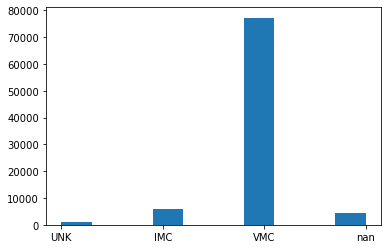

In [41]:
plt.hist(Qdf2['Weather.Condition'])

Looks like VMC has the most counts.
From googling: 
VMC: Visual Meteorological Conditions. Clear conditions. Visibility more than 5km, min. cloudbase 1500 ft
IMC: Instrument Meteorogical Conditions, is weather that require the use of instruments, typically cloudy or low visibility. These data points seems like extreme weather conditions or unclear conditions.

In [42]:
Qdf2['Weather.Condition'].isna().sum()

4454

In [43]:
# I am going to replace NaNs with VMC

In [44]:
Qdf2.loc[:,'Weather.Condition'] =Qdf2.loc[:,'Weather.Condition'].fillna('VMC')

/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [45]:
Qdf2['Weather.Condition'].isna().sum()

0

Text(0.5, 1.0, 'Weather Conditions with Crashes Counts')

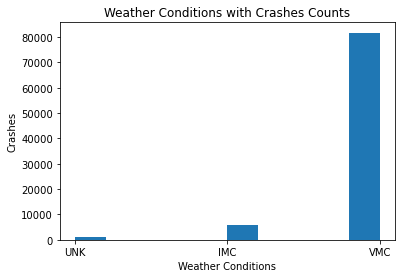

In [46]:
plt.hist(Qdf2['Weather.Condition'])
plt.xlabel('Weather Conditions')
plt.ylabel('Crashes')
plt.title('Weather Conditions with Crashes Counts')

In [47]:
Qdf2['Weather.Condition'].value_counts(normalize=True)

VMC    0.920181
IMC    0.067244
UNK    0.012575
Name: Weather.Condition, dtype: float64

Conclusion: 92% of crashes happened under VMC, or clear conditions?

Still not so sure what you can do with this info.

# Purposes of flights and crashes

In [48]:
Qdf['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.597942
Instructional                0.128191
Unknown                      0.082252
Aerial Application           0.056979
Business                     0.048587
Positioning                  0.019904
Other Work Use               0.015285
Ferry                        0.009819
Aerial Observation           0.009601
Public Aircraft              0.008706
Executive/corporate          0.006687
Flight Test                  0.004897
Skydiving                    0.002201
External Load                0.001487
Public Aircraft - Federal    0.001270
Banner Tow                   0.001221
Air Race show                0.001197
Public Aircraft - Local      0.000895
Public Aircraft - State      0.000774
Air Race/show                0.000713
Glider Tow                   0.000641
Firefighting                 0.000484
Air Drop                     0.000133
ASHO                         0.000073
PUBS                         0.000048
PUBL                         0.000012
Name: Purpos

In [49]:
Qdf['Purpose.of.flight'].isna().sum()/len(Qdf['Purpose.of.flight'])

0.08468366759640501

8.5% data points in purpose of flight are NaNs.

In [50]:
Qdf3 = Qdf1
Qdf3.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_and_Model
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,STINSON 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,PIPER PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,CESSNA 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,ROCKWELL 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,CESSNA 501


Using ratios to randomly assign the NaNs to top 11 purposes of flights


In [51]:
Qdf3.loc[:,'Purpose.of.flight'] = Qdf3.loc[:,'Purpose.of.flight'].fillna(pd.Series(np.random.choice([
    'Personal','Instructional','Unknown','Aerial Application','Business','Positioning','Other Work Use',
    'Ferry','Aerial Observation','Public Aircraft','Executive/corporate'],
    p =[0.60,0.13,0.08,0.06,0.05,0.02,0.02,0.01,0.01,0.01,0.01], size= len(Qdf))))

/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [52]:
Qdf3['Purpose.of.flight'].isna().sum()

0

In [53]:
Qdf3['Purpose.of.flight'].value_counts()[:10]


Personal              53104
Instructional         11425
Unknown                7265
Aerial Application     5104
Business               4324
Positioning            1785
Other Work Use         1384
Ferry                   870
Aerial Observation      859
Public Aircraft         773
Name: Purpose.of.flight, dtype: int64

In [54]:
top_10_flight_purposes = list(Qdf3['Purpose.of.flight'].value_counts()[:10].index)

In [55]:
top_10_flight_purposes_crashes = list(Qdf3['Purpose.of.flight'].value_counts()[:10].values)

Text(0.5, 1.0, 'Top 10 Purposes of Crashed Flights')

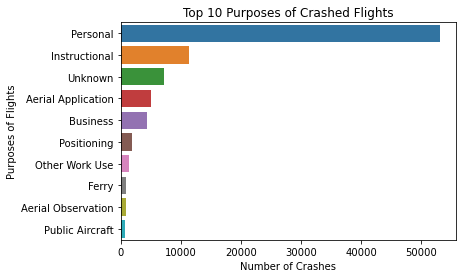

In [56]:
fig,ax= plt.subplots()
sns.barplot(x=top_10_flight_purposes_crashes, y=top_10_flight_purposes)
ax.set_xlabel('Number of Crashes')
ax.set_ylabel('Purposes of Flights')
ax.set_title('Top 10 Purposes of Crashed Flights')

# Looking into Engine Types


In [57]:
Qdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [58]:
Engine_Type_Counts = Qdf['Engine.Type'].value_counts()
Engine_Type_Counts

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [59]:
Engine_Type = list(Engine_Type_Counts.index)
Engine_Type

['Reciprocating',
 'Turbo Shaft',
 'Turbo Prop',
 'Turbo Fan',
 'Unknown',
 'Turbo Jet',
 'None',
 'Geared Turbofan',
 'Electric',
 'NONE',
 'LR',
 'UNK',
 'Hybrid Rocket']

In [60]:
Engine_Type_Counts = list(Engine_Type_Counts.values)
Engine_Type_Counts

[69530, 3609, 3391, 2481, 2051, 703, 19, 12, 10, 2, 2, 1, 1]

<AxesSubplot:>

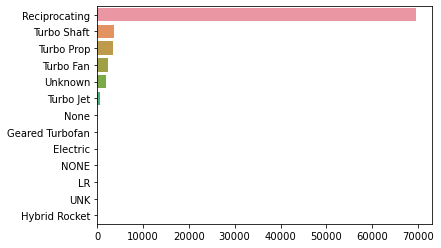

In [61]:
sns.barplot(x = Engine_Type_Counts, y = Engine_Type)

It seems like Reciprocating engine has the most crashes.


Combine Engine Types with Purpose of flights might give us more insights?


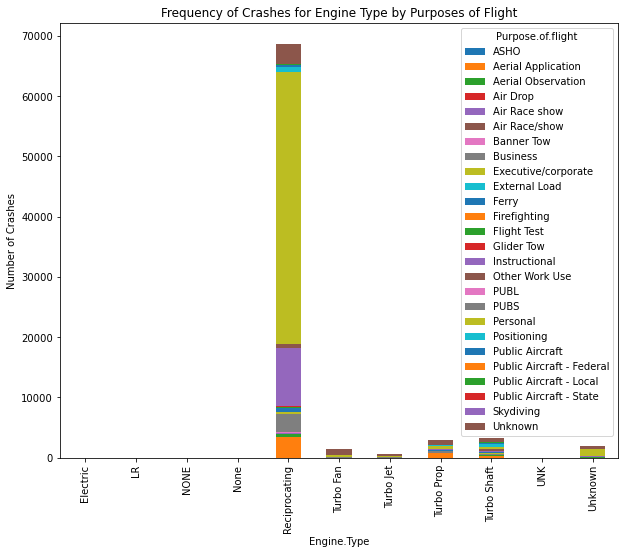

In [62]:
Qdf4 = Qdf.groupby(['Engine.Type', 'Purpose.of.flight']).size().unstack()
Qdf4.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Engine.Type')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Engine Type by Purposes of Flight')
plt.show()

This graph shows that reciprocating engines with personal, instructional, aerial applications purpooses of flights are top combinations
for crashing.

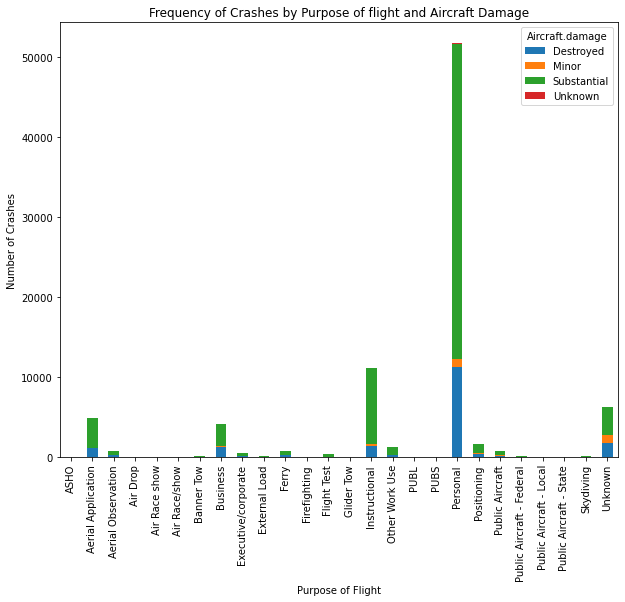

In [63]:
Qdf5 = Qdf3.groupby(['Purpose.of.flight', 'Aircraft.damage']).size().unstack()
Qdf5.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Purpose of flight and Aircraft Damage')
plt.show()

# Look into weather conditions and aircraft damage


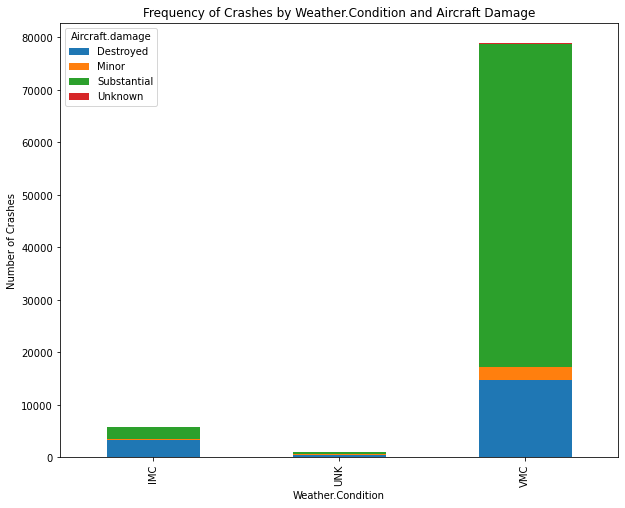

In [64]:
Qdf6 = Qdf2.groupby(['Weather.Condition', 'Aircraft.damage']).size().unstack()
Qdf6.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Weather.Condition')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Weather.Condition and Aircraft Damage')
plt.show()

It seems like weather do have correlation with aircraft damage.


IMC has greater ratio for destroyed damage level.


In [65]:
# Load the data from 'Aviation_Data.csv' in the data folder into a pandas DataFrame:
Odf = pd.read_csv('./data/Aviation_Data.csv', encoding='ISO-8859-1', low_memory=False)

In [66]:
# Explore the data by checking the first few rows and getting some basic information:
Odf.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [67]:
Odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

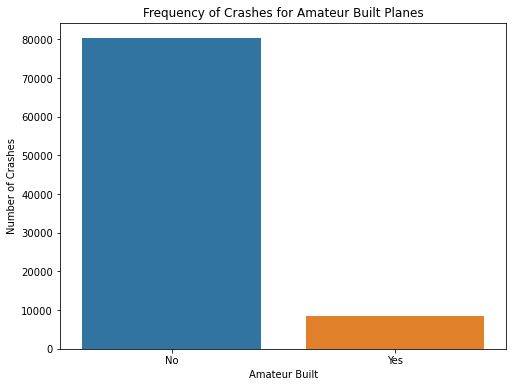

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x='Amateur.Built', data=Odf)
plt.xlabel('Amateur Built')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Amateur Built Planes')
plt.show()

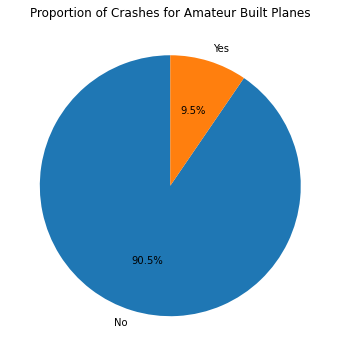

In [69]:
plt.figure(figsize=(8,6))
counts = Odf['Amateur.Built'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Crashes for Amateur Built Planes')
plt.show()

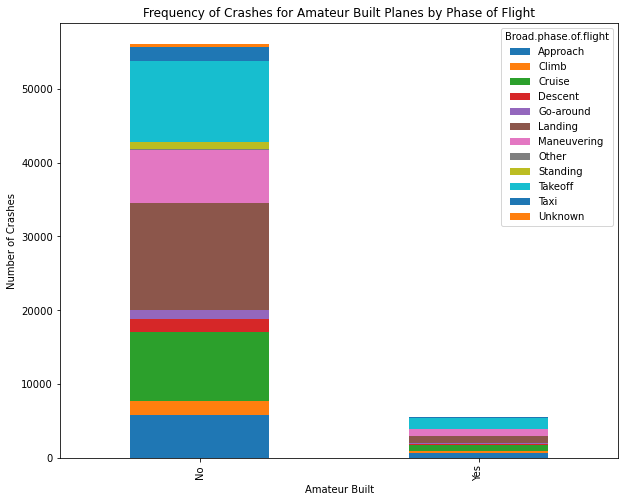

In [70]:
Odf2 = Odf.groupby(['Amateur.Built', 'Broad.phase.of.flight']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Amateur Built')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Amateur Built Planes by Phase of Flight')
plt.show()


In [71]:
Odf

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

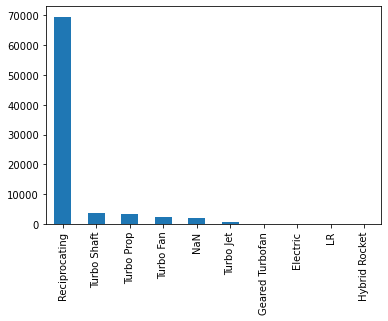

In [72]:
Odf['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
pd.value_counts(Odf['Engine.Type']).plot.bar()

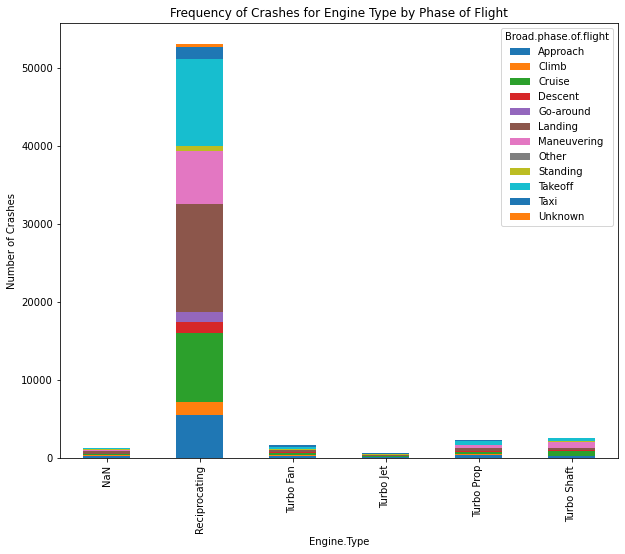

In [73]:
Odf2 = Odf.groupby(['Engine.Type', 'Broad.phase.of.flight']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Engine.Type')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Engine Type by Phase of Flight')
plt.show()


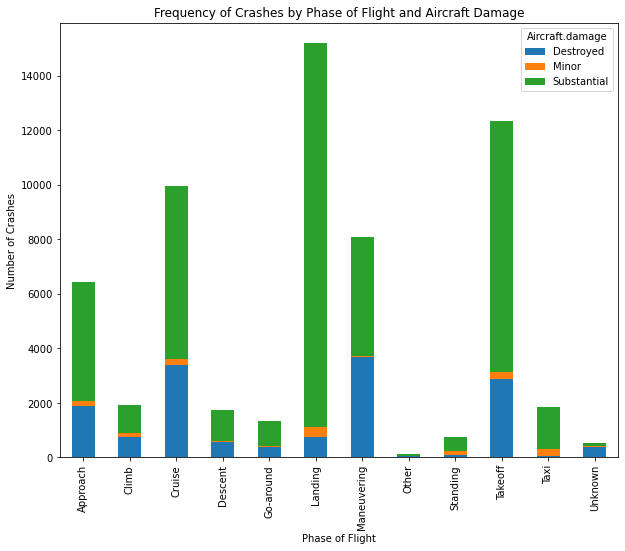

In [74]:
# To answer the first question ("Is there a correlation between the Make/Model of the plane to the number of plane crashes"), we can create a bar chart to visualize the frequency of crashes for each make and model:
Odf2 = Odf.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Phase of Flight and Aircraft Damage')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [75]:
Sdf1 = pd.read_csv('./data/Aviation_Data.csv', encoding='ISO-8859-1', low_memory=False)
Sdf1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [76]:
Sdf1.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [77]:
Sdf1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [78]:
Sdf1.shape

(90348, 31)

In [79]:
Sdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [80]:
aircraft_info = Sdf1.loc[:, ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Air.carrier', 'Publication.Date']]
aircraft_info

,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Air.carrier,Publication.Date
0,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN
1,Piper,PA24-180,No,1.0,Reciprocating,NaN,19-09-1996
2,Cessna,172M,No,1.0,Reciprocating,NaN,26-02-2007
3,Rockwell,112,No,1.0,Reciprocating,NaN,12-09-2000
4,Cessna,501,No,NaN,NaN,NaN,16-04-1980
...,...,...,...,...,...,...,...
90343,PIPER,PA-28-151,No,NaN,NaN,NaN,29-12-2022
90344,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,NaN,27-12-2022
90346,CESSNA,210N,No,NaN,NaN,MC CESSNA 210N LLC,NaN


In [81]:
# filling empty values
aircraft_info['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
aircraft_info.head(20)

,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Air.carrier,Publication.Date
0,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN
1,Piper,PA24-180,No,1.0,Reciprocating,NaN,19-09-1996
2,Cessna,172M,No,1.0,Reciprocating,NaN,26-02-2007
3,Rockwell,112,No,1.0,Reciprocating,NaN,12-09-2000
4,Cessna,501,No,NaN,NaN,NaN,16-04-1980
5,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Air Canada,19-09-2017
6,Cessna,180,No,1.0,Reciprocating,NaN,06-11-2001
7,Cessna,140,No,1.0,Reciprocating,NaN,01-01-1982
8,Cessna,401B,No,2.0,Reciprocating,NaN,01-01-1982
9,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,01-01-1982


In [82]:
Aircraft_Make=aircraft_info['Make']
MAKE_Uniques=Aircraft_Make.unique()
    
MAKE_Uniques

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [83]:
# list out an array of ALL makes, lowercase and merge
MAKE_Counts = aircraft_info['Make'].str.lower().value_counts().sort_values()
MAKE_Counts

guarino                              1
aves douglas james                   1
hart                                 1
ross alfred k/oneill terrence        1
excel jet                            1
                                 ...  
bell                              2722
boeing                            2745
beech                             5372
piper                            14870
cessna                           27149
Name: Make, Length: 7587, dtype: int64

In [84]:
MAKE_top_10 = MAKE_Counts.nlargest(10)
MAKE_top_10

cessna      27149
piper       14870
beech        5372
boeing       2745
bell         2722
mooney       1334
robinson     1230
grumman      1172
bellanca     1045
hughes        932
Name: Make, dtype: int64

In [85]:
# mask = TEST_MAKE_to_ints['Make'].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# TEST_MAKE_to_ints = TEST_MAKE_to_ints.loc[mask]
# TEST_MAKE_to_ints.head(20)

In [86]:
# # This make_map store the most common 10 .str values for 'Make', in an integer value
# make_map = {'cessna': 0, 'piper': 1, 'beech': 2, 'boeing': 3, 'bell': 4, 'mooney': 5, 'robinson': 6, 'grumman': 7, 'bellanca': 8, 'hughes': 9}
# make_map

In [87]:
# FreQ10_Engines=pd.DataFrame(aircraft_info[['Make', 'Number.of.Engines']])
# FreQ10_Engines['Make'] = FreQ10_Engines['Make'].str.lower()
# FreQ10_Engines

In [88]:
# # TOP 10 CARRIERS REPRESENTING CRASHES
# TEST_MAKE_to_ints = FreQ10_Engines.copy()
# TEST_MAKE_to_ints['Make'] = TEST_MAKE_to_ints['Make'].replace(make_map)
# TEST_MAKE_to_ints

# ENGINES

In [89]:
AC_engines = aircraft_info["Number.of.Engines"].value_counts()
AC_engines

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [90]:
Engine_type=aircraft_info['Engine.Type']
Engine_unqiues=Engine_type.unique()
Engine_unqiues

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'NaN',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [91]:
Engine_COUNTS=Engine_type.value_counts()
Engine_COUNTS

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
NaN                 2073
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

# COMPARING ENGINES COUNT, WITH CRASH PROBABILITY

In [92]:
# replace the '0.0' values in "Number.of.Engines" with NaN
aircraft_info["Number.of.Engines"].replace({0.0: np.nan}, inplace=True)
aircraft_info

,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Air.carrier,Publication.Date
0,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN
1,Piper,PA24-180,No,1.0,Reciprocating,NaN,19-09-1996
2,Cessna,172M,No,1.0,Reciprocating,NaN,26-02-2007
3,Rockwell,112,No,1.0,Reciprocating,NaN,12-09-2000
4,Cessna,501,No,NaN,NaN,NaN,16-04-1980
...,...,...,...,...,...,...,...
90343,PIPER,PA-28-151,No,NaN,NaN,NaN,29-12-2022
90344,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,NaN,27-12-2022
90346,CESSNA,210N,No,NaN,NaN,MC CESSNA 210N LLC,NaN


In [93]:
# store Engine value counts in a new variable, for further processing
AC_engines = aircraft_info["Number.of.Engines"].value_counts()
AC_engines

1.0    69582
2.0    11079
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [94]:
# this code block adds all engine value counts, divides each value by the sum, 
# then multiplies by 100, resulting in each values percentage total.
ENG_total = AC_engines.sum()
AC_ENG_percentage =AC_engines / ENG_total * 100
AC_ENG_percentage = AC_ENG_percentage.sort_values()
AC_ENG_percentage

6.0     0.001226
8.0     0.003677
4.0     0.528322
3.0     0.592064
2.0    13.580701
1.0    85.294009
Name: Number.of.Engines, dtype: float64

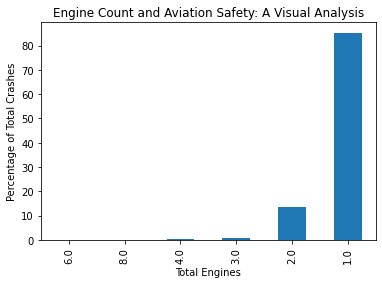

In [95]:
AC_ENG_percentage.plot(kind="bar")

plt.title("Engine Count and Aviation Safety: A Visual Analysis")
plt.xlabel("Total Engines")
plt.ylabel("Percentage of Total Crashes")

plt.show()

In [96]:
Sdf11 = pd.read_csv('./data/Aviation_Data.csv', encoding='ISO-8859-1', low_memory=False)
Sdf11

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [97]:
Sdf11.head(15)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [98]:
Sdf11.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [99]:
SDF =Sdf11.loc[:, ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Air.carrier', 'Weather.Condition', 'Publication.Date', 'Broad.phase.of.flight', 'Total.Uninjured', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Location', 'Purpose.of.flight', 'Report.Status', 'Investigation.Type']]
SDF

,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Air.carrier,Weather.Condition,Publication.Date,Broad.phase.of.flight,Total.Uninjured,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Purpose.of.flight,Report.Status,Investigation.Type
0,Stinson,108-3,No,1.0,Reciprocating,NaN,UNK,NaN,Cruise,0.0,2.0,0.0,0.0,"MOOSE CREEK, ID",Personal,Probable Cause,Accident
1,Piper,PA24-180,No,1.0,Reciprocating,NaN,UNK,19-09-1996,Unknown,0.0,4.0,0.0,0.0,"BRIDGEPORT, CA",Personal,Probable Cause,Accident
2,Cessna,172M,No,1.0,Reciprocating,NaN,IMC,26-02-2007,Cruise,NaN,3.0,NaN,NaN,"Saltville, VA",Personal,Probable Cause,Accident
3,Rockwell,112,No,1.0,Reciprocating,NaN,IMC,12-09-2000,Cruise,0.0,2.0,0.0,0.0,"EUREKA, CA",Personal,Probable Cause,Accident
4,Cessna,501,No,NaN,NaN,NaN,VMC,16-04-1980,Approach,0.0,1.0,2.0,NaN,"Canton, OH",Personal,Probable Cause,Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,PIPER,PA-28-151,No,NaN,NaN,NaN,NaN,29-12-2022,NaN,0.0,0.0,1.0,0.0,"Annapolis, MD",Personal,NaN,Accident
90344,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Hampton, NH",NaN,NaN,Accident
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,NaN,VMC,27-12-2022,NaN,1.0,0.0,0.0,0.0,"Payson, AZ",Personal,NaN,Accident
90346,CESSNA,210N,No,NaN,NaN,MC CESSNA 210N LLC,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Morgan, UT",Personal,NaN,Accident


In [100]:
# remove '.' delimiters from column titles
for col in SDF.columns:
    if '.' in col:
        new_col = col.replace('.', ' ')
        SDF.rename(columns={col: new_col}, inplace=True)
SDF

,Make,Model,Amateur Built,Number of Engines,Engine Type,Air carrier,Weather Condition,Publication Date,Broad phase of flight,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Location,Purpose of flight,Report Status,Investigation Type
0,Stinson,108-3,No,1.0,Reciprocating,NaN,UNK,NaN,Cruise,0.0,2.0,0.0,0.0,"MOOSE CREEK, ID",Personal,Probable Cause,Accident
1,Piper,PA24-180,No,1.0,Reciprocating,NaN,UNK,19-09-1996,Unknown,0.0,4.0,0.0,0.0,"BRIDGEPORT, CA",Personal,Probable Cause,Accident
2,Cessna,172M,No,1.0,Reciprocating,NaN,IMC,26-02-2007,Cruise,NaN,3.0,NaN,NaN,"Saltville, VA",Personal,Probable Cause,Accident
3,Rockwell,112,No,1.0,Reciprocating,NaN,IMC,12-09-2000,Cruise,0.0,2.0,0.0,0.0,"EUREKA, CA",Personal,Probable Cause,Accident
4,Cessna,501,No,NaN,NaN,NaN,VMC,16-04-1980,Approach,0.0,1.0,2.0,NaN,"Canton, OH",Personal,Probable Cause,Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,PIPER,PA-28-151,No,NaN,NaN,NaN,NaN,29-12-2022,NaN,0.0,0.0,1.0,0.0,"Annapolis, MD",Personal,NaN,Accident
90344,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Hampton, NH",NaN,NaN,Accident
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,NaN,VMC,27-12-2022,NaN,1.0,0.0,0.0,0.0,"Payson, AZ",Personal,NaN,Accident
90346,CESSNA,210N,No,NaN,NaN,MC CESSNA 210N LLC,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Morgan, UT",Personal,NaN,Accident


In [101]:
# transform all 'Make' values to lowercase
SDF['Make'] = SDF['Make'].str.lower()
SDF

,Make,Model,Amateur Built,Number of Engines,Engine Type,Air carrier,Weather Condition,Publication Date,Broad phase of flight,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Location,Purpose of flight,Report Status,Investigation Type
0,stinson,108-3,No,1.0,Reciprocating,NaN,UNK,NaN,Cruise,0.0,2.0,0.0,0.0,"MOOSE CREEK, ID",Personal,Probable Cause,Accident
1,piper,PA24-180,No,1.0,Reciprocating,NaN,UNK,19-09-1996,Unknown,0.0,4.0,0.0,0.0,"BRIDGEPORT, CA",Personal,Probable Cause,Accident
2,cessna,172M,No,1.0,Reciprocating,NaN,IMC,26-02-2007,Cruise,NaN,3.0,NaN,NaN,"Saltville, VA",Personal,Probable Cause,Accident
3,rockwell,112,No,1.0,Reciprocating,NaN,IMC,12-09-2000,Cruise,0.0,2.0,0.0,0.0,"EUREKA, CA",Personal,Probable Cause,Accident
4,cessna,501,No,NaN,NaN,NaN,VMC,16-04-1980,Approach,0.0,1.0,2.0,NaN,"Canton, OH",Personal,Probable Cause,Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,piper,PA-28-151,No,NaN,NaN,NaN,NaN,29-12-2022,NaN,0.0,0.0,1.0,0.0,"Annapolis, MD",Personal,NaN,Accident
90344,bellanca,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Hampton, NH",NaN,NaN,Accident
90345,american champion aircraft,8GCBC,No,1.0,NaN,NaN,VMC,27-12-2022,NaN,1.0,0.0,0.0,0.0,"Payson, AZ",Personal,NaN,Accident
90346,cessna,210N,No,NaN,NaN,MC CESSNA 210N LLC,NaN,NaN,NaN,0.0,0.0,0.0,0.0,"Morgan, UT",Personal,NaN,Accident


<AxesSubplot:>

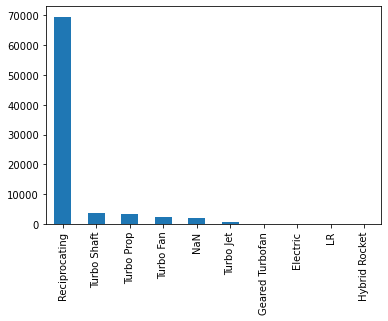

In [102]:
# remove NaN values and plot
SDF['Engine Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
pd.value_counts(SDF['Engine Type']).plot.bar()

In [103]:
SDF['Total Uninjured'].mean()

5.325439579642552

In [104]:
SDF.groupby(['Engine Type', 'Purpose of flight']).mean()

Number of Engines  Total Uninjured  \
Engine Type Purpose of flight                                               
Electric    Business                            1.000000         2.000000   
            Flight Test                         4.333333         0.000000   
            Personal                            2.000000         0.000000   
LR          Business                            8.000000         5.500000   
NaN         Aerial Application                  1.000000         0.100000   
...                                                  ...              ...   
Turbo Shaft Public Aircraft                     1.132780         1.623256   
            Public Aircraft - Federal           1.166667         1.178571   
            Public Aircraft - Local             1.053571         1.433962   
            Public Aircraft - State             1.100000         1.068966   
            Unknown                             1.166400         1.795491   

                                       Total Fatal Injuries  \
Engine Type Purpose of flight                                 
Electric    Business                               0.000000   
            Flight Test                            0.000000   
            Personal                               0.500000   
LR          Business                               0.000000   
NaN         Aerial Application                     0.600000   
...                                                     ...   
Turbo Shaft Public Aircraft                        0.489011   
            Public Aircraft - Federal              0.571429   
            Public Aircraft - Local                0.187500   
            Public Aircraft - State                0.703704   
            Unknown                                0.717286   

                                       Total Serious Injuries  \
Engine Type Purpose of flight                                   
Electric    Business                                 0.000000   
            Flight Test                              0.000000   
            Personal                                 0.250000   
LR          Business                                10.500000   
NaN         Aerial Application                       0.500000   
...                                                       ...   
Turbo Shaft Public Aircraft                          0.489247   
            Public Aircraft - Federal                0.518519   
            Public Aircraft - Local                  0.760000   
            Public Aircraft - State                  0.535714   
            Unknown                                  0.456452   

                                       Total Minor Injuries  
Engine Type Purpose of flight                                
Electric    Business                               0.000000  
            Flight Test                            0.000000  
            Personal                               0.000000  
LR          Business                               1.500000  
NaN         Aerial Application                     0.300000  
...                                                     ...  
Turbo Shaft Public Aircraft                        0.586022  
            Public Aircraft - Federal              0.655172  
            Public Aircraft - Local                0.360000  
            Public Aircraft - State                0.250000  
            Unknown                                0.743134  

[111 rows x 5 columns]

In [105]:
SDF.groupby(['Model', 'Make']).mean()

,,Number of Engines,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries
Model,Make,,,,,
&GCBC,champion,1.0,2.0,0.0,0.0,0.0
(EX) RV-6,vans,1.0,0.0,2.0,0.0,0.0
(MODIFIED),eipper quicksiver e,1.0,0.0,1.0,0.0,0.0
(SOLOY CONVERSION),bell 47g-3b,1.0,1.0,0.0,0.0,0.0
-269C,schweizer,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
lebed,bely,1.0,0.0,2.0,0.0,0.0
none,ortmayer/parson,1.0,NaN,1.0,1.0,NaN
sportstar,evektor,1.0,2.0,NaN,NaN,NaN


In [106]:
SDF.groupby('Amateur Built').mean('Air carrier')

,Number of Engines,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries
Amateur Built,,,,,
No,1.162319,5.753583,0.664315,0.280060,0.359415
Yes,1.002445,0.899335,0.432936,0.270588,0.333333


In [107]:
# groups engine type by num of engines
SDF.groupby(['Engine Type', 'Number of Engines']).mean()

Total Uninjured  Total Fatal Injuries  \
Engine Type     Number of Engines                                          
Electric        1.0                       0.500000              0.250000   
                4.0                       1.666667              0.000000   
                8.0                       0.000000              0.000000   
Geared Turbofan 2.0                      11.000000              0.000000   
Hybrid Rocket   1.0                       0.000000              1.000000   
LR              8.0                       5.500000              0.000000   
NaN             0.0                       3.584733              0.504630   
                1.0                       9.969697              0.338710   
                2.0                      36.000000              1.050000   
                3.0                       8.000000              0.000000   
                4.0                      94.571429              0.000000   
Reciprocating   0.0                       1.000000              0.500000   
                1.0                       1.101229              0.348458   
                2.0                       1.735914              0.767524   
                3.0                       4.250000              0.000000   
                4.0                       2.150943              1.160000   
Turbo Fan       1.0                      17.619048              0.814815   
                2.0                      76.151586              1.618943   
                3.0                     115.304469              2.177215   
                4.0                     147.205882              5.911765   
Turbo Jet       1.0                       0.607143              0.593023   
                2.0                      46.184579              1.093407   
                3.0                      97.202020              0.090909   
                4.0                      85.061224              6.177778   
Turbo Prop      1.0                       1.236802              0.511335   
                2.0                       8.746163              1.116235   
                4.0                       8.277778              3.176471   
Turbo Shaft     1.0                       1.345174              0.492344   
                2.0                       2.212581              0.923628   
                3.0                       4.000000              1.000000   

                                   Total Serious Injuries  \
Engine Type     Number of Engines                           
Electric        1.0                              0.250000   
                4.0                              0.000000   
                8.0                              0.000000   
Geared Turbofan 2.0                              0.000000   
Hybrid Rocket   1.0                              0.000000   
LR              8.0                             10.500000   
NaN             0.0                              0.401235   
                1.0                              0.359375   
                2.0                              0.428571   
                3.0                              0.000000   
                4.0                              0.000000   
Reciprocating   0.0                              0.000000   
                1.0                              0.223252   
                2.0                              0.226667   
                3.0                              0.400000   
                4.0                              0.250000   
Turbo Fan       1.0                              0.142857   
                2.0                              0.849190   
                3.0                              0.947205   
                4.0                              0.913462   
Turbo Jet       1.0                              0.250000   
                2.0                              0.494565   
                3.0                              0.230769   
                4.0                              0.217391   
Turbo Prop      

In [108]:
# groups engine type by num of engines (BUT ONLY 2 OR MORE)
SDF[SDF['Number of Engines']>2].groupby(['Engine Type', 'Number of Engines']).mean()

Total Uninjured  Total Fatal Injuries  \
Engine Type   Number of Engines                                          
Electric      4.0                       1.666667              0.000000   
              8.0                       0.000000              0.000000   
LR            8.0                       5.500000              0.000000   
NaN           3.0                       8.000000              0.000000   
              4.0                      94.571429              0.000000   
Reciprocating 3.0                       4.250000              0.000000   
              4.0                       2.150943              1.160000   
Turbo Fan     3.0                     115.304469              2.177215   
              4.0                     147.205882              5.911765   
Turbo Jet     3.0                      97.202020              0.090909   
              4.0                      85.061224              6.177778   
Turbo Prop    4.0                       8.277778              3.176471   
Turbo Shaft   3.0                       4.000000              1.000000   

                                 Total Serious Injuries  Total Minor Injuries  
Engine Type   Number of Engines                                                
Electric      4.0                              0.000000              0.000000  
              8.0                              0.000000              0.000000  
LR            8.0                             10.500000              1.500000  
NaN           3.0                              0.000000              0.500000  
              4.0                              0.000000              0.571429  
Reciprocating 3.0                              0.400000              1.200000  
              4.0                              0.250000              0.387755  
Turbo Fan     3.0                              0.947205              3.347962  
              4.0                              0.913462              2.038647  
Turbo Jet     3.0                              0.230769              1.056818  
              4.0                              0.217391              0.851064  
Turbo Prop    4.0                              0.181818              0.687500  
Turbo Shaft   3.0                              0.000000              0.000000

In [109]:
SDF.groupby('Engine Type').max('Number of Engines')

,Number of Engines,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries
Engine Type,,,,,
Electric,8.0,5.0,1.0,1.0,0.0
Geared Turbofan,2.0,121.0,0.0,0.0,0.0
Hybrid Rocket,1.0,0.0,1.0,0.0,1.0
LR,8.0,10.0,0.0,13.0,2.0
NaN,4.0,370.0,229.0,106.0,380.0
Reciprocating,4.0,208.0,82.0,17.0,62.0
Turbo Fan,4.0,699.0,270.0,137.0,125.0
Turbo Jet,4.0,495.0,256.0,33.0,30.0
Turbo Prop,4.0,363.0,70.0,26.0,27.0


In [110]:
SDF.groupby('Engine Type').count()

,Make,Model,Amateur Built,Number of Engines,Air carrier,Weather Condition,Publication Date,Broad phase of flight,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Location,Purpose of flight,Report Status,Investigation Type
Engine Type,,,,,,,,,,,,,,,,
Electric,10,10,10,8,6,10,9,0,10,10,10,10,10,9,8,10
Geared Turbofan,12,12,12,11,12,1,11,0,12,12,12,12,12,0,1,12
Hybrid Rocket,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1
LR,2,2,2,2,2,2,1,0,2,2,2,2,2,2,2,2
NaN,2072,2071,2072,790,48,2063,1609,1272,1948,1923,1895,1899,2045,2042,2068,2073
Reciprocating,69519,69506,69518,69025,9436,69081,57277,53108,65248,60842,60064,60706,69519,68729,68565,69530
Turbo Fan,2481,2478,2475,2380,1465,2216,2235,1589,2417,1994,2062,2027,2478,1454,2246,2481
Turbo Jet,703,703,703,695,280,690,574,568,668,590,588,581,703,572,690,703
Turbo Prop,3391,3390,3391,3326,1517,3295,3024,2243,3121,2870,2753,2790,3390,2944,3243,3391


In [111]:
SDF.groupby('Number of Engines').count()

,Make,Model,Amateur Built,Engine Type,Air carrier,Weather Condition,Publication Date,Broad phase of flight,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Location,Purpose of flight,Report Status,Investigation Type
Number of Engines,,,,,,,,,,,,,,,,
0.0,1226,1226,1226,692,182,1214,1052,743,1106,970,1028,995,1223,1225,1194,1226
1.0,69569,69550,69570,67708,10540,68748,57735,51236,65296,60721,60064,60786,69571,68476,66978,69582
2.0,11078,11072,11071,10499,3909,10414,9202,8056,10446,9697,9501,9463,11076,9144,10195,11079
3.0,483,483,483,469,259,463,365,442,478,425,435,429,482,410,468,483
4.0,431,431,431,398,229,386,350,325,419,375,377,377,426,302,390,431
6.0,1,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1
8.0,3,3,3,3,3,3,2,0,3,3,3,3,3,3,3,3


In [112]:
SDF.groupby('Model').count()

,Make,Amateur Built,Number of Engines,Engine Type,Air carrier,Weather Condition,Publication Date,Broad phase of flight,Total Uninjured,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Location,Purpose of flight,Report Status,Investigation Type
Model,,,,,,,,,,,,,,,,
&GCBC,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
(EX) RV-6,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1
(MODIFIED),1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1
(SOLOY CONVERSION),1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
-269C,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lebed,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1
none,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1
sportstar,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1
